In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4_btms_sizing_sensitivity'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

In [33]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df)
    sizing_results.append(sizing_results_one_param_combination)
    # recognize parameters from a_b_c_factor.csv file
    df = pd.read_csv(os.path.join(sizing_results_path, folder, 'a_b_c_factor.csv'))
    sizing_results_params.append(df)
    


In [39]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

[1 2 0 3]


In [46]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 5.0, 10.0]


In [64]:
# print all values for a between 1 and 21 which are missing as a list
a_not_included = []
for i in range(1, 21):
    if i not in a_values:
        a_not_included.append(i)
print(a_not_included)

[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [48]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df, timestep), index=[df.name]))
    stats_per_param_combination_list.append(stats)

In [49]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [55]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b,cost_c,cost_total,share_cost_a,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,293.820264,10.366081,25.091318,5.780339,41.237738,0.238752,0.618776,0.142472,683.684094,1.843184,1.938834,0.879970,0.992976
std,138.168865,7.787580,12.446179,2.886805,22.494362,0.031154,0.025452,0.007424,441.610667,0.906512,0.493533,0.080120,0.047210
min,43.701893,0.653385,1.929722,0.439680,3.022787,0.210443,0.428341,0.097080,44.000000,0.437926,1.000000,0.468542,0.602497
25%,193.796912,5.655302,15.616240,3.591919,24.827583,0.225501,0.615296,0.140863,382.416667,1.235758,1.556322,0.845350,1.000000
50%,278.095766,9.637511,25.496990,5.808849,41.188706,0.233645,0.622374,0.142734,651.916667,1.668766,1.910094,0.886528,1.000000
75%,396.050626,12.889421,32.798105,7.524769,53.123992,0.242508,0.630467,0.144143,878.083333,2.239896,2.248761,0.935030,1.000000
max,839.148784,49.315125,70.948321,17.000054,137.263444,0.474580,0.638392,0.180198,2957.166667,6.819215,3.680815,0.993225,1.000000


In [57]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b,cost_c,cost_total,share_cost_a,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,157.000000,157.000000,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000
mean,3.856357e+01,9.506579,2.102447e+00,4.866903e-01,12.095716,0.789159,1.712592e-01,3.958188e-02,683.684094,6.766195,2.035312,1.177808e-01,0.135158
std,3.594655e+01,3.088646,2.025833e+00,4.758281e-01,3.565455,0.229578,1.863018e-01,4.343926e-02,441.610667,10.517981,1.993804,2.156180e-01,0.191379
min,1.084912e-07,0.065339,4.716983e-08,1.077322e-08,2.434740,0.026836,4.782497e-09,1.092285e-09,44.000000,0.720181,1.000000,1.603413e-09,0.027774
25%,2.980690e-05,9.863013,3.376499e-06,7.719181e-07,9.863014,0.685402,3.423394e-07,7.826391e-08,382.416667,2.406231,1.013254,2.379489e-07,0.063098
50%,3.572811e+01,9.863014,1.729769e+00,3.949553e-01,11.357342,0.828462,1.397061e-01,3.183227e-02,651.916667,4.280184,1.295858,5.379285e-02,0.096207
75%,6.637853e+01,9.863014,3.446688e+00,8.028596e-01,14.017223,1.000000,2.562212e-01,5.915348e-02,878.083333,6.292121,1.771644,1.065233e-01,0.124664
max,1.675783e+02,19.726028,8.295514e+00,2.307722e+00,29.920599,1.000000,7.925780e-01,1.987357e-01,2957.166667,60.000000,12.445062,9.932248e-01,1.000000


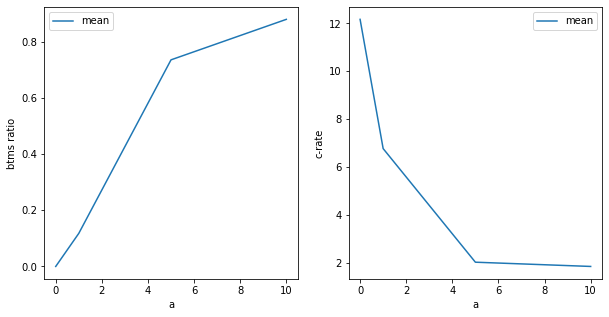

In [62]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(a_values, stats_per_param_combination.loc[:, 'btms_ratio'].groupby(level=0).mean(), label='mean')
# add error bars
#ax[0].errorbar(a_values, stats_per_param_combination.loc[:, 'btms_ratio'].groupby(level=0).mean(), yerr=stats_per_param_combination.loc[:, 'btms_ratio'].groupby(level=0).std(), label='std')
ax[0].set_xlabel('a')
ax[0].set_ylabel('btms ratio')
ax[0].legend()
# plot c-rate in the second subplot
ax[1].plot(a_values, stats_per_param_combination.loc[:, 'c_rate'].groupby(level=0).mean(), label='mean')
# add error bars
#ax[1].errorbar(a_values, stats_per_param_combination.loc[:, 'c_rate'].groupby(level=0).mean(), yerr=stats_per_param_combination.loc[:, 'c_rate'].groupby(level=0).std(), label='std')
ax[1].set_xlabel('a')
ax[1].set_ylabel('c-rate')
ax[1].legend()
